<a href="https://colab.research.google.com/github/korayercan/CarEvaluation/blob/main/CarEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df.shape

(1727, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
for col in df.columns:
  print(col, df[col].value_counts())

buying buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety safety
med     576
high    576
low     575
Name: count, dtype: int64
class class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [11]:
#class -> dependent, doors, persons -> numeric, rest -> categorical

In [12]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [13]:
df['doors'] = df['doors'].replace('5more', 5)
df['doors'] = df['doors'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int64(1), object(6)
memory usage: 94.6+ KB


In [15]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [16]:
df['persons'] = df['persons'].replace('more', 5)
df['persons'] = df['persons'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   int64 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [23]:
X = df.drop('class', axis=1)
y = df['class']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [28]:
cat_cols = ['buying', 'maint', 'lug_boot', 'safety']
buy_maint_order = ["low", "med", "high", "vhigh"]
lug_boot_order  = ["small", "med", "big"]
safety_order    = ["low", "med", "high"]

enc = OrdinalEncoder(categories=[buy_maint_order, buy_maint_order,
                                lug_boot_order, safety_order])

preprocessor = ColumnTransformer(transformers=[('encoder', enc, cat_cols)],
                                 remainder='passthrough')

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [32]:
pd.DataFrame(X_train_transformed)[5].unique()

array([2., 4., 5.])

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [41]:
y_pred = tree_model.predict(X_test_transformed)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.976878612716763
[[119   0   1   1]
 [  3  18   0   0]
 [  7   0 349   0]
 [  0   0   0  21]]
              precision    recall  f1-score   support

         acc       0.92      0.98      0.95       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.98      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.98       519
   macro avg       0.97      0.96      0.96       519
weighted avg       0.98      0.98      0.98       519



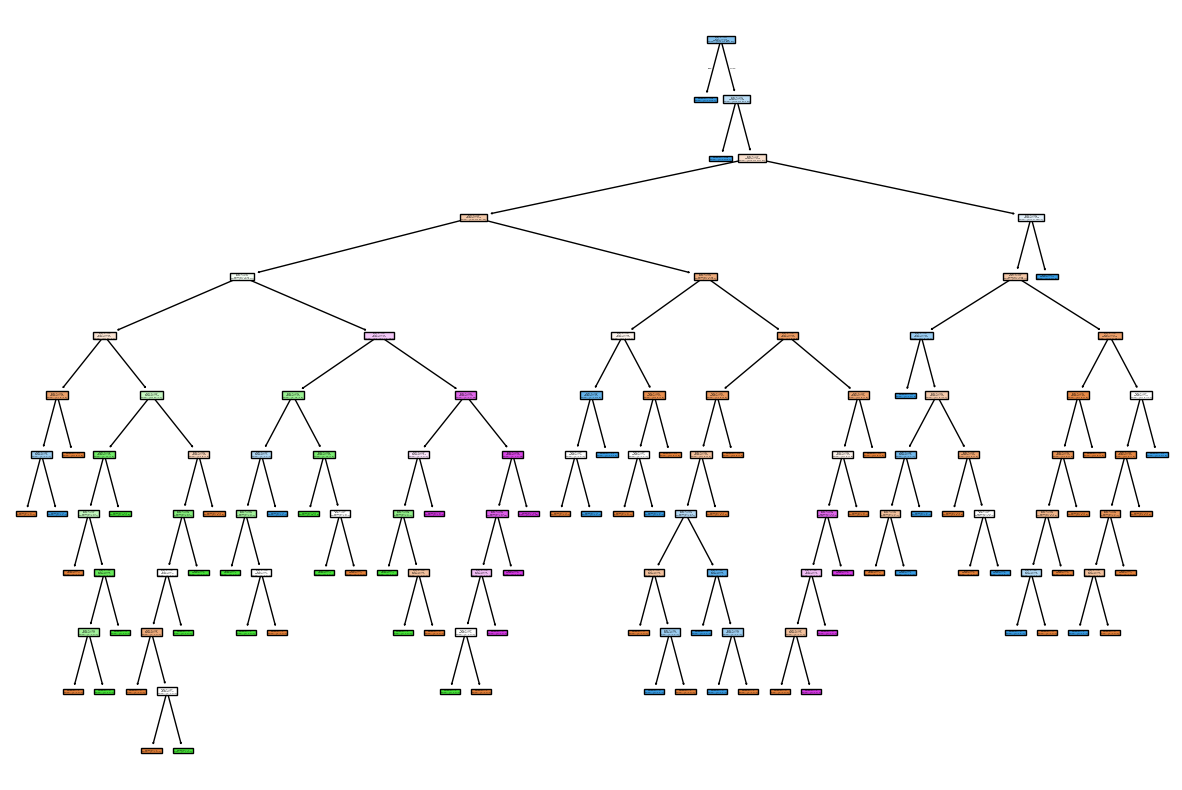

In [44]:
plt.figure(figsize=(15, 10))
from sklearn import tree
tree.plot_tree(tree_model.fit(X_train_transformed, y_train), filled=True)
plt.show()

In [45]:
#hyperparameter tuning

In [46]:
param = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split" : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "max_features" : ["auto", "sqrt", "log2", None]
    }

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [50]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [51]:
y_pred = grid.predict(X_test_transformed)

In [52]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9749518304431599
[[118   1   2   0]
 [  2  19   0   0]
 [  8   0 348   0]
 [  0   0   0  21]]
              precision    recall  f1-score   support

         acc       0.92      0.98      0.95       121
        good       0.95      0.90      0.93        21
       unacc       0.99      0.98      0.99       356
       vgood       1.00      1.00      1.00        21

    accuracy                           0.97       519
   macro avg       0.97      0.96      0.97       519
weighted avg       0.98      0.97      0.98       519

